# Описание проекта
**Цель проекта** изучение гипотез с целью увеличения выручки интернет-магазина.
Данный проект состоит из 4-х частей:
- Знакомство с данными
- Приоретизация гипотез
- Анализ A/B-теста
- Вывод

**Описание данных**

**hypothesis**
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**orders**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**visitors**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Изучим общую информацию о данных

In [1]:
#подключаем бтблиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats


In [2]:
#импортируем данные
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orderы.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [9]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**Заметка**
- Поменяем тип данных в некоторых столбцах
- Приведем названия столбцов к общепринятому виду
- Аномальные значения на данном этапе не выявлены

# Предобработка данных

In [12]:
list_tables = [hypothesis, orders, visitors] #список таблиц
list_nametables = ['hypothesis', 'orders', 'visitors'] 


for i in list_tables:           #приводим названия к нижнему регистру
    i.columns = i.columns.str.lower()
    print(i.head(3))
    
orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'},  inplace=True)

                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
   transactionid   visitorid        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507


In [13]:
orders['date'] = pd.to_datetime(orders['date']) #заменяем типы данных
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
for i in range (0, len(list_tables)):        #провем, есть ли пропуски
        print('-----------------------------')
        print(f'{list_nametables[i]}')
        print('-----------------------------')
        print(list_tables[i].isna().sum())

-----------------------------
hypothesis
-----------------------------
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
-----------------------------
orders
-----------------------------
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
-----------------------------
visitors
-----------------------------
date        0
group       0
visitors    0
dtype: int64


In [15]:
for i in range (0, len(list_tables)):        #провем, есть ли дубликаты
        print('-----------------------------')
        print(f'{list_nametables[i]}')
        print('-----------------------------')
        print(list_tables[i].duplicated().sum())

-----------------------------
hypothesis
-----------------------------
0
-----------------------------
orders
-----------------------------
0
-----------------------------
visitors
-----------------------------
0


In [16]:
#Проверим количество групп в А/Б тесте и количество пользователей в каждой 
print(orders['group'].shape[0])
print(orders.groupby('group')['group'].count())

1197
group
A    557
B    640
Name: group, dtype: int64


Количество пользователей в группе В больше на 14%. Это очень большая разница. 
Для начала проверим, не попали ли некоторые пользователи в обе группы.

In [17]:
A = orders[orders['group']=='A']['visitor_id']
B = orders[orders['group']=='B']['visitor_id']

AB = orders.loc[orders['visitor_id'].isin(A) & orders['visitor_id'].isin(B), 'visitor_id'].unique()
print(AB.shape[0])

58


у нас есть 58 пользователей, которые попали в обе группы

In [18]:
# удалим таких пользователей
orders = orders.loc[~orders['visitor_id'].isin(AB)]

NameError: name 'visitors_AB' is not defined

In [19]:
print(orders.groupby('group')['group'].count())

group
A    557
B    640
Name: group, dtype: int64


Разница стала больше, но теперь мы точно знаем, что у нас нет пользователей, попавших в обе группы. Учтем эту разницу в дальнеших исследованиях.

In [20]:
print (orders['date'].min()) #дата начала эксперимента
print (orders['date'].max()) #дата окончания эксперимента

2019-08-01 00:00:00
2019-08-31 00:00:00


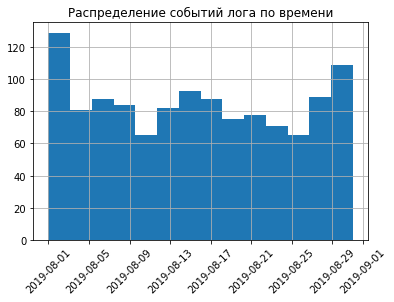

In [21]:
orders['date'].hist(bins=14) # логи за 14 дней
plt.xticks(rotation=45)
plt.title('Распределение событий лога по времени');

**На данном этапе**
- Были заменены типы данных
- Исправлены названия столбцов
- Пропусков в данных нет
- Аномальные значения не выявлены

- Мы действительно имеем информацию о двух группах
- Имеем полные данные за август
- Были замечены пользователи, попавшие сразу в две группы. После их удаления разница в количестве пользователей между группами стала больше. Учтем это в дальнейшей работе.


# Приоритизация гипотез

In [22]:
# создаем новый столбец ice и отсортируем по убыванию приоритета
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

pd.options.display.max_colwidth = 210

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200
0,"Добавить два новых канала привлечения трафика,...",13.333
7,Добавить форму подписки на все основные страни...,11.200
6,Показать на главной странице баннеры с актуаль...,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000
1,"Запустить собственную службу доставки, что сок...",2.000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333
3,"Изменить структура категорий, что увеличит кон...",1.125
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000


**Метод приориизации ICE показал, что в ТОП-3 попали гипотезы 8, 0 и 7**

In [23]:
# создаем новый столбец rice и отсортируем по убыванию приоритета
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

pd.options.display.max_colwidth = 210

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Метод приориизации RICE показал, что в ТОП-3 попали гипотезы 2, 0 и 7**

In [24]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2


Таким образом лидерами приоретизации стали гипотезы 0 и 7. Изменение приоретизации объясним тем, что у 2-й гипотезы большой охват - 8, а у 8-ой гипотезы охват равен всего 1

# A/B-тест

## Стабильность кумулятивных метрик

**Построим график кумулятивной выручки по группам**

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


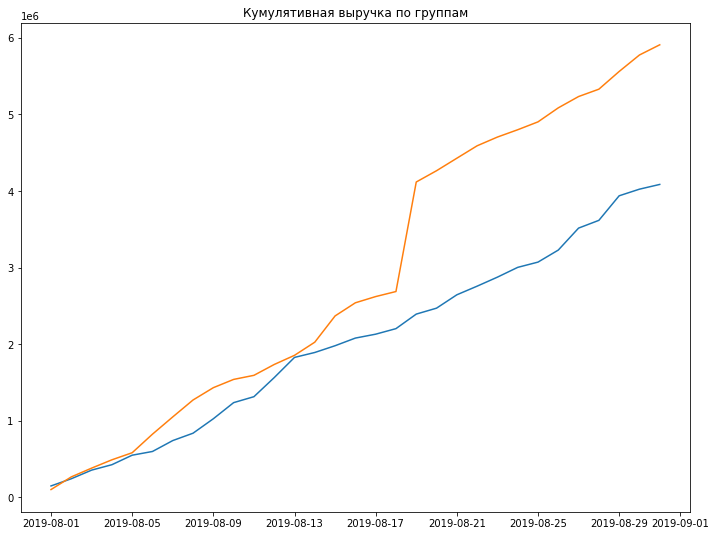

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 9))


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')

plt.show()

Выручка почти равномерно увеличивается в течение всего теста, что является хорошим знаком. Но мы можем заметить точки резкого роста у группы **B**. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Далее разберем подробнее.


**График кумулятивного среднего чека по группам**

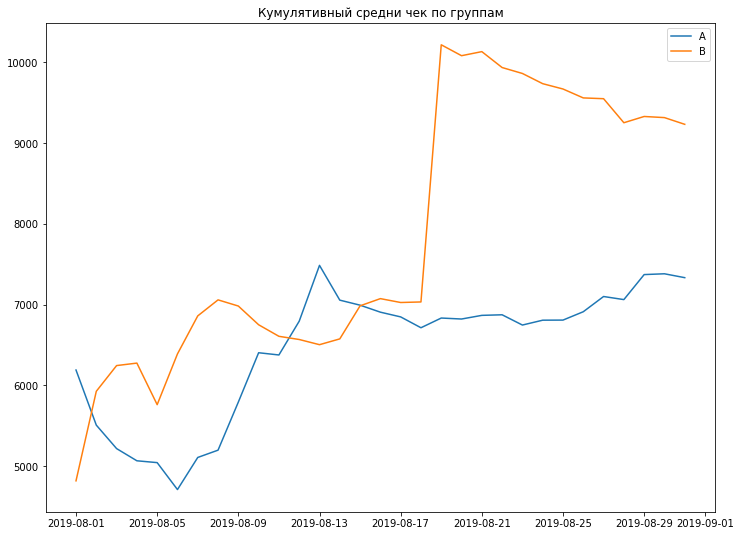

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средни чек по группам')

plt.legend()

**Видим резкий скачок показателей для обеих групп.** При этом средний чек группы **А** ниже, среднего чека группы **В**. Обеим группам удалось повысить показатели и установиться на уровне.

 **График относительного изменения кумулятивного среднего чека группы B к группе A** 

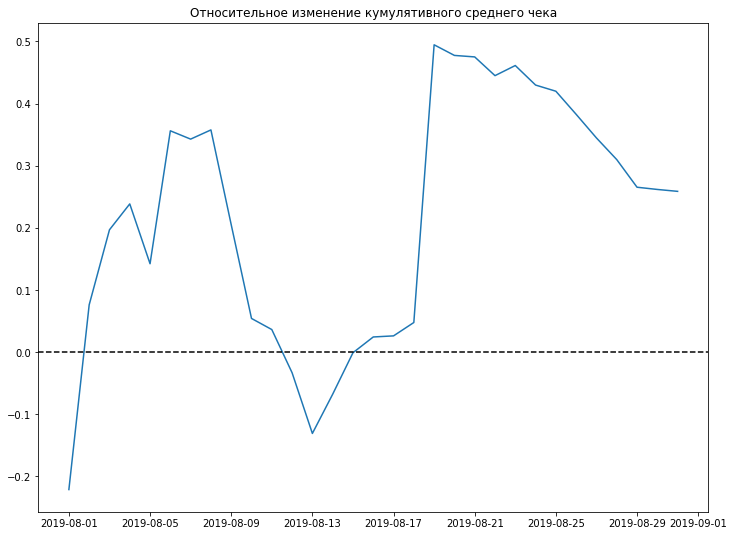

In [28]:
plt.figure(figsize=(12, 9))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

График различия между сегментами резко скачет. Позже проверим наличие крупных заказов и выбросов. 

 **График кумулятивной конверсии**

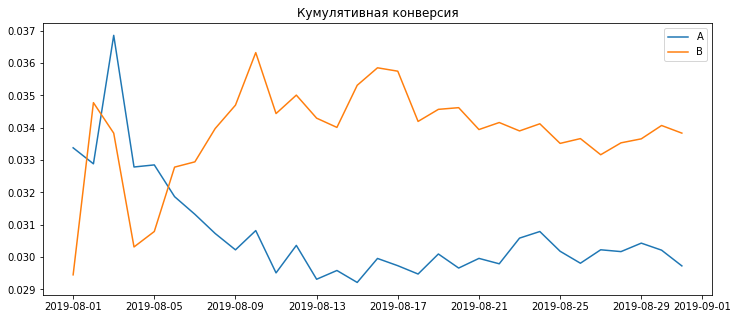

In [29]:
plt.figure(figsize=(12, 5)) #график кумулятивного среднего чека по группам

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')

plt.legend()



Кумулятивная конверсия групп симметрична. Конверсия группы **В** поднялась и зафиксировалась, конверсия группы **А** упала и тоже зафиксировалась.

**График относительного различия кумулятивных конверсий**

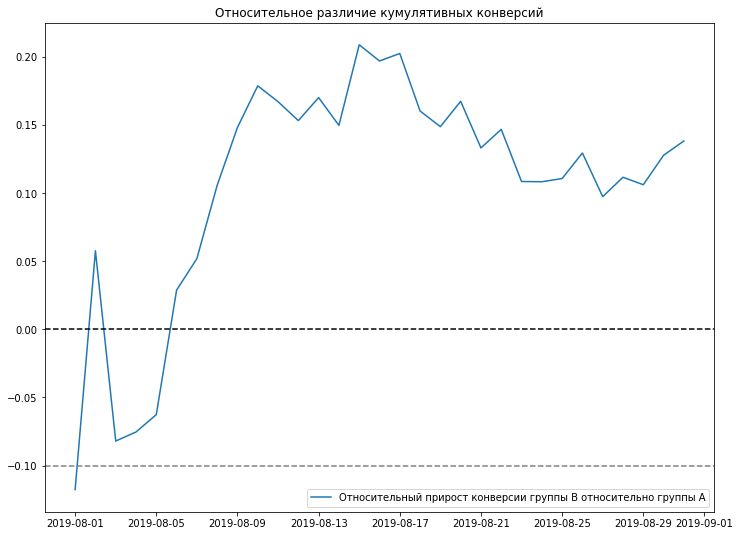

In [30]:
plt.figure(figsize=(12, 9))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное различие кумулятивных конверсий')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


**Вывод**

Мы видим хороший прирост конверсии группы **В** относитьельно группы **А**. Несмотря на низкий показатель в начале эксперимента, конверсия группы **В** выросла и удержала высокий результат.  

## Анализ выбросов и всплесков

### Количетсво заказов

In [31]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [32]:
print(ordersByUsers.groupby('orders')['userId'].count())

orders
1     937
2      64
3      17
4       3
5       6
8       1
9       1
11      2
Name: userId, dtype: int64


Большинство пользователей сделали всего один заказ

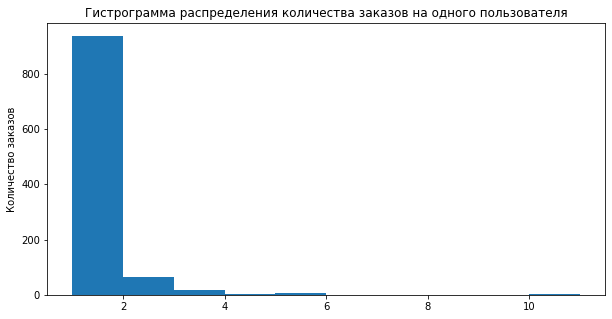

In [33]:
#строим гистограмму распределения заказов на одного пользователя

plt.figure(figsize=(10, 5))
plt.hist(ordersByUsers['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=12)
plt.ylabel('Количество заказов', fontsize=10)
plt.show()



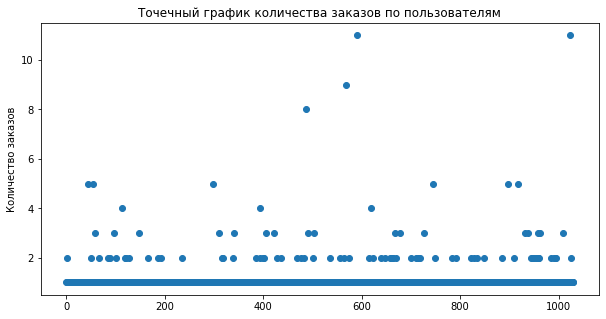

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям', fontsize=12)
plt.ylabel('Количество заказов', fontsize=10)
plt.show()


In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))


[2. 4.]


Большинство покупателей заказывали только один раз.

### Стоимость заказов 

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

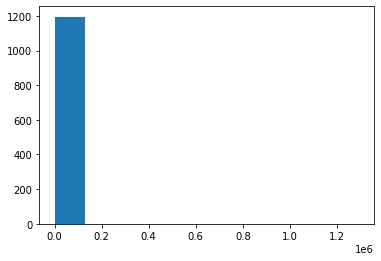

In [36]:
plt.hist(orders['revenue']) 

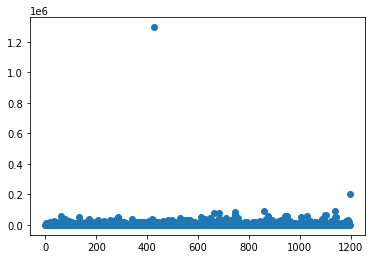

In [37]:
x_values = pd.Series(range(0,len(orders['revenue']))) 
plt.scatter(x_values, orders['revenue']) 

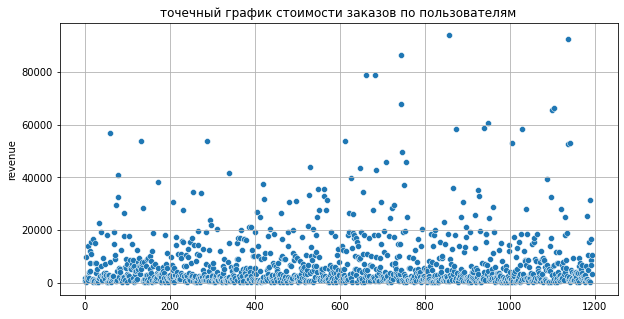

In [38]:
orders_clean = orders.query('revenue<200000') 
x_values = pd.Series(range(0,orders_clean['revenue'].count())) 
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue",
                     data=orders_clean)
plt.title('точечный график стоимости заказов по пользователям')

plt.grid();


**Вывод:** из-за одного крупного заказа, показатели группы сильно увеличились.

**Определим 95 и 99 перцентили количествав заказов**


In [39]:
print(np.percentile(orders['revenue'], [95, 99])) 


[28000.  58233.2]


Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей.


## Статистическая значимость

### Не очищенные данные

**Сформулируем гипотезы.** 
**Нулевая:** различий в среднем количестве заказов между группами нет. **Альтернативная:** различия в среднем между группами есть.
Н

In [40]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [41]:
#Объявим переменные sampleA и sampleB, 
#в которых пользователям из разных групп будет соответствовать количество заказов. 

Anoorders = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')
Bnoorders = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')

sampleA = pd.concat([ordersByUsersA['orders'], Anoorders])
sampleB = pd.concat([ordersByUsersB['orders'], Bnoorders])

In [42]:
print('p_value: ', stats.mannwhitneyu(sampleA, sampleB)[1])

print('средняя к онверсия группы B: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value:  0.016792355056752608
средняя к онверсия группы B:  0.138


 p-value = 0.011, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не принимаем. Средняя конверсия группы В больше средней конверсии группы А.

**Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть. 


In [43]:
print('p_value: ', stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('средний чек группы B: ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p_value:  0.7292909855432458
средний чек группы B:  0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы В сильно превышает средний чек группы А.

### Очищенные данные

In [44]:
# расчет количества пользователей в выбранную дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitorsAcummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitorsAcummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitorsBcummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitorsBcummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
ordersAdaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersAdaily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
ordersAcummulative = ordersAdaily.apply(
    lambda x: ordersAdaily[ordersAdaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersAcummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
ordersBdaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBdaily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
ordersBcummulative = ordersBdaily.apply(
    lambda x: ordersBdaily[ordersBdaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBcummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий
data = (
    ordersAdaily.merge(
        ordersBdaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersAcummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBcummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsAcummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBcummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 


        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01                 24              148579                 21   
1 2019-08-02                 20               93822                 24   
2 2019-08-03                 24              112473                 16   
3 2019-08-04                 16               70825                 17   
4 2019-08-05                 25              124218                 23   

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0              101217                    24                 148579   
1              165531                    44                 242401   
2              114248                    68                 354874   
3              108571                    84                 425699   
4               92428                   109                 549917   

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0                    21                 101217                 

In [45]:
#Узнаем, сколько всего аномальных пользователей

max_revenue =  int(np.percentile(orders["revenue"], [95]))
max_orders=  int((np.percentile(ordersByUsers['orders'], [95])))


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 




1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


**Вего 86 аномальных пользователей**

In [46]:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(
        ordersByUsersA['userId']
        .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(ordersByUsersA['orders'])), name='orders')], axis=0)



sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(
        ordersByUsersB['userId']
        .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(ordersByUsersB['orders'])), name='orders')], axis=0)



**Нулевая:** различий в среднем количестве заказов между группами нет. **Альтернативная:** различия в среднем между группами есть. Н

In [47]:
# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p_value: ', (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# рассчет относительного различия в конверсии между группами
print('Средняя конверсия группы В: ','{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


p_value:  0.013042592743036745
Средняя конверсия группы В:  0.173


**p-value** = 0.015, что меньше 0.05. Нулевую гипотезу можно отвергнуть. Средняя конверсия группы **В** больше средней конверсии группы **А**.

**Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть

In [48]:
print('p_value: ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Средний чек группы В: ',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p_value:  0.738
Средний чек группы В:  -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом результат почти не отличается он значения p_value по сырым данным. Срежний чек группы **В** меньше среднего чека группы **А**.

# Общий вывод

## **Целью проекта было изучение гипотез с целью увеличения выручки интернет-магазина** 

***Этап 1: Знакомство с данными***
Была получена общая информация о данных, дубликаты и пропуски отсутвуют, аномальных значений нет. Были заменены типы данных в некоторых столбцах, а также названия некоторых столбцов. 

***Этап 2: Приоретизация гипотез***
Было применено два фреймворка для приоретизации гипотез. 
* Метод приориизации **ICE** показал, что в **ТОП-3** попали гипотезы **8, 0** и **7**
* Метод приориизации **RICE** показал, что в **ТОП-3** попали гипотезы **2, 0** и **7**
Таким образом **лидерами приоретизации стали гипотезы 0 и 7**. Изменение приоретизации объясним тем, что у 2-й гипотезы большой охват - 8, а у 8-ой гипотезы охват равен всего 1

***Этап 3: Анализ A/B-теста***
1. Выручка почти равномерно увеличивается в течение всего теста
2. Был замечен резкий скачок показателей среднего чека для обеих групп после 2019-08-10
3. Кумулятивная конверсия групп симметрична. Конверсия группы В поднялась и зафиксировалась, конверсия группы А упала и тоже зафиксировалась.

**Анализ выбросов и всплесков показал:**
1. Есть пользователи, которые совершали 2-3 заказов, что значительно больше, чем обычный пользователь за неделю.
2. Не более 5% пользователей оформляли больше чем 1 заказа
3. Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей.


**Было проведено два исследования по очищенным и сырым данным.**
***Сформулированы следующие гипотезы:***
1. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.
2. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

**Анализ A/B-теста показал:**

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Различие в средней конверсии между группам - 0.174 по отфильтрованным данным и 0.160 по шумным данным. Результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* Нет статистически значимого различия по среднему чеку между группами в обоих исследованиях. Относительное различие в среднем чеке между группами - 0.287 по неочищенным данным и -0.034 по отфильтрованным. Однаком было замечено снижение среднего чека группы В.

**Таким образом**, тестирование можно остановить. Общие показатели группы В лучше.